In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io

plt.rc("font", family=["Helvetica", "Arial"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [4]:
entries_list_sT = os.listdir(r"/Users/karsten/eksperimental/Experimentel-Physics-2/Tredje labdag/glas til luft/s/Datafiler/transmitteret")
entries_list_sR = os.listdir(r"/Users/karsten/eksperimental/Experimentel-Physics-2/Tredje labdag/glas til luft/s/Datafiler/reflekteret")

t1_90 = 90*np.pi/180

def func(x, a):
    return a

d = io.loadmat(r"/Users/karsten/eksperimental/Experimentel-Physics-2/Tredje labdag/baggrund måling.mat")
d_offset = d.get("A")
d_offset = np.reshape(d_offset, (len(d_offset)))

t = np.linspace(0, 50, len(d_offset))
mean_Voff, pcovoff = curve_fit(func, t, d_offset, absolute_sigma=True)
usOff = np.sqrt(np.diag(pcovoff))

d = io.loadmat(r"/Users/karsten/eksperimental/Experimentel-Physics-2/Tredje labdag/glas til luft/s - 90 grader med krystal.mat")
d90 = d.get("A")
d90 = np.reshape(d90, (len(d90)))


t = np.linspace(0, 50, len(d90))
mean_V90, pcov90 = curve_fit(func, t, d90, absolute_sigma=True)
us90 = np.sqrt(np.diag(pcov90))
mean_V90 = mean_V90 - mean_Voff


In [5]:
def get_ts_Vs(t, entries):
    if t == "T":
        rempart = "t("
        file_dest = "transmitteret"
    else:
        rempart = "r("
        file_dest = "reflekteret"
        
    ts = np.zeros((len(entries), 2))
    Vs = np.zeros((len(entries),2))
    for i, file in enumerate(entries):
        name = file.replace(rempart, "")
        name = name.replace(".mat", "")
        name = name.replace(")", "")
        indx = name.find(",")
        ts12 = float(name[0:indx])*np.pi/180, float(name[indx + 1:len(name)])*np.pi/180
        ts[i] = ts12
        
    for i, file in enumerate(entries):
        dat = io.loadmat(f"/Users/karsten/eksperimental/Experimentel-Physics-2/Tredje labdag/glas til luft/s/Datafiler/{file_dest}/{file}")
        V = dat.get("A")
        V = np.reshape(V, (len(V)))
        xs = np.linspace(0, 50, len(V))
        fitted, pcov = curve_fit(func, xs, V, absolute_sigma=True)
        perr1 = np.sqrt(np.diag(pcov))
        Vs[i][0] = fitted - mean_Voff
        Vs[i][1] = perr1
        
    return Vs, ts

In [6]:
mean_VsT, ts_trans = get_ts_Vs("T", entries_list_sT)
mean_VsR, ts_ref = get_ts_Vs("R", entries_list_sR)

In [7]:
Ts = mean_VsT/mean_V90
Rs = mean_VsR/mean_V90

print(Ts)

[[ 1.05965904e+00  2.95100991e-03]
 [ 1.00606093e+00  2.95100992e-03]
 [ 1.08235997e+00  2.95100992e-03]
 [ 1.11062167e+00  2.95100991e-03]
 [ 1.90228164e-02  2.95100989e-03]
 [ 1.03778805e+00  2.95100991e-03]
 [ 1.05504604e+00  2.95100990e-03]
 [ 9.81574573e-01  2.95100991e-03]
 [ 9.37920317e-01  2.95100991e-03]
 [ 8.83715256e-01  2.95100990e-03]
 [ 8.88857857e-01  2.95100992e-03]
 [ 7.92526238e-01  2.95100991e-03]
 [ 7.03448894e-01  2.95100991e-03]
 [ 4.34077872e-01  2.95100992e-03]
 [ 7.88934952e-03  2.95100991e-03]
 [-6.70989527e-04  2.95100992e-03]
 [ 1.00568201e+00  2.95100991e-03]]


[0.13962634 0.27925268 0.40142573 0.46251225 0.54105207 0.60213859
 0.68067841 0.75049158 0.8115781  0.89011792 0.9424778  1.02974426
 1.11701072 1.21300383 1.3962634 ]


<ipython-input-8-4e38bc23553d>:6: RuntimeWarning: invalid value encountered in arcsin
  theta_ag = np.arcsin(n*np.sin(theta))


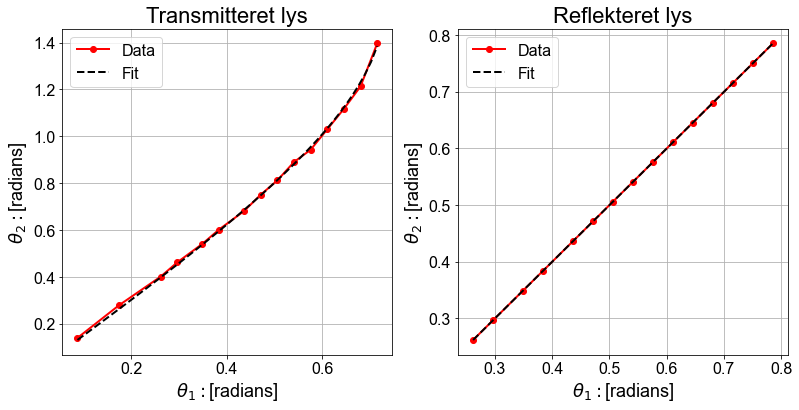

In [8]:
fig, axs = plt.subplots(1,2, figsize=(13,6))
axs[1].set_title("Reflekteret lys")
axs[0].set_title("Transmitteret lys")

def snell(theta, n):
    theta_ag = np.arcsin(n*np.sin(theta))
    return theta_ag

theta1T = np.zeros(len(ts_trans))
theta2T = np.zeros(len(ts_trans))

theta1R = np.zeros(len(ts_ref))
theta2R = np.zeros(len(ts_ref))

i = 0
for t1, t2 in ts_trans:
    theta1T[i] = t1
    theta2T[i] = t2 + t1
    i = i + 1
    
i = 0
for t1, t2 in ts_ref:
    theta1R[i] = t1
    theta2R[i] = t1
    i = i + 1
    
theta1T1 = np.sort(theta1T)[0:len(theta1T) - 2]
theta2T1 = np.sort(theta2T)[0:len(theta2T) - 2]

print(theta2T1)
axs[0].plot(theta1T1, theta2T1, 'o-', c='r', lw=2, label="Data")
axs[1].plot(theta1R, theta2R, 'o-', c='r', lw=2, label="Data")

nT, pcovT = curve_fit(snell, theta1T1, theta2T1)
nR, pcovR = curve_fit(snell, theta1R, theta2R, absolute_sigma=True)

theta_T = np.linspace(min(theta1T1), max(theta1T1))
theta_R = np.linspace(min(theta1R), max(theta1R))

axs[0].plot(theta_T, snell(theta_T, nT), c='k', ls="--", label="Fit", lw=2)
axs[1].plot(theta_R, snell(theta_R, nR), c='k', ls="--", label="Fit", lw=2)

for ax in axs:
    ax.grid()
    ax.set_xlabel(r"$\theta_1: $[radians]")
    ax.set_ylabel(r"$\theta_2: $[radians]")
    ax.legend()


In [9]:
print(nT, np.sqrt(np.diag(pcovT)))

[1.4979804] [0.00196574]


<ipython-input-10-2be8e5998acc>:12: RuntimeWarning: invalid value encountered in arcsin
  theta_2 = np.arcsin(n_komb*np.sin(theta_1))
<ipython-input-10-2be8e5998acc>:7: RuntimeWarning: invalid value encountered in arcsin
  theta_2 = np.arcsin(n_komb*np.sin(theta_1)) #Indsæt kombination af brydningsindekser, så det passer med f.eks. ns = n_a/n_g, eller omvendt


Text(0, 0.5, 'R')

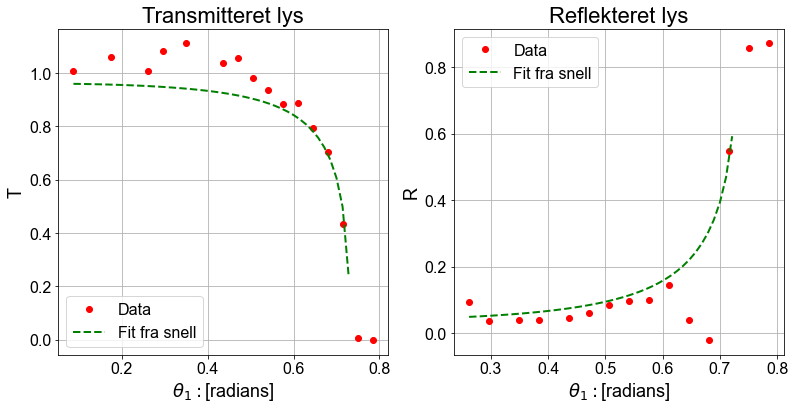

In [10]:
fig, axs = plt.subplots(1,2, figsize=(13,6))
axs[1].set_title("Reflekteret lys")
axs[0].set_title("Transmitteret lys")


def Rkoef(theta_1, n_komb): #Gælder kun for S polariseret lys
    theta_2 = np.arcsin(n_komb*np.sin(theta_1)) #Indsæt kombination af brydningsindekser, så det passer med f.eks. ns = n_a/n_g, eller omvendt
    R_s = np.sin(theta_1 - theta_2)**2/(np.sin(theta_1 + theta_2)**2)
    return R_s

def Tkoef(theta_1, n_komb): #Gælder kun for S polariseret lys
    theta_2 = np.arcsin(n_komb*np.sin(theta_1))
    T_s = np.sin(2*theta_1)*np.sin(2*theta_2)/(np.sin(theta_1 + theta_2)**2)
    return T_s



theta1T_n = np.delete(theta1T, 4)
Ts_n = np.delete(np.transpose(Ts)[0], 4)
theta2T_n = np.delete(theta2T, 4)

for i in range(11):
    if Ts_n[i] < 0.2:
        theta1T_n = np.delete(theta1T_n, i)
        Ts_n = np.delete(Ts_n, i)
        theta2T_n = np.delete(theta2T_n, i)
#print(theta1T_n)       


axs[0].plot(theta1T_n, Ts_n, 'o', c='r', label="Data")
axs[1].plot(theta1R, np.transpose(Rs)[0], 'o', c='r', label="Data")

theta_T = np.linspace(min(theta1T_n), max(theta1T_n))
theta_R = np.linspace(min(theta1R), max(theta1R))

axs[0].plot(theta_T, Tkoef(theta_T, nT), ls="--", c="g", lw=2, label="Fit fra snell")
axs[1].plot(theta_R, Rkoef(theta_R, nT), ls="--", c="g", lw=2, label="Fit fra snell")

for ax in axs:
    ax.grid()
    ax.legend()
    ax.set_xlabel(r"$\theta_1: $[radians]")
axs[0].set_ylabel(r"T")
axs[1].set_ylabel(r"R")


In [11]:
print(nT, np.sqrt(np.diag(pcovT)))

[1.4979804] [0.00196574]
